In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('../data/ch12_scores_reg.csv')
n = len(df)
print(n)
df.head()

20


,小テスト,期末テスト,睡眠時間,通学方法
0,4.2,67,7.2,バス
1,7.2,71,7.9,自転車
2,0.0,19,5.3,バス
3,3.0,35,6.8,徒歩
4,1.5,35,7.5,徒歩


In [3]:
x = np.array(df['小テスト'])
y = np.array(df['期末テスト'])
p = 1

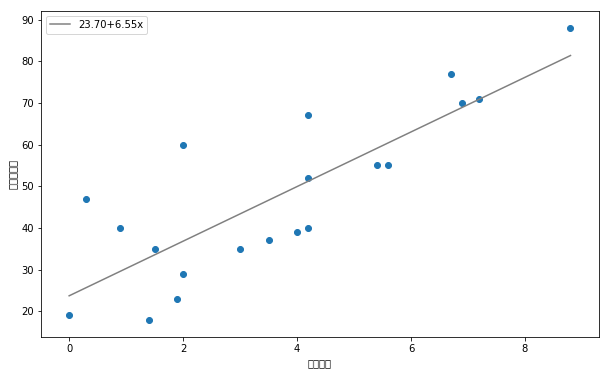

In [6]:
poly_fit = np.polyfit(x,y,1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_xlabel('小テスト')
ax.set_ylabel('期末テスト')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()
plt.show()

In [10]:
formula = '期末テスト ~ 小テスト'
result = smf.ols(formula, df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  期末テスト   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           8.59e-06
Time:                        11:24:15   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.0

In [11]:
X = np.array([np.ones_like(x), x]).T
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [12]:
beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(23.699495346731215, 6.553732606043082)

In [13]:
y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat

In [14]:
s_var = np.var(eps_hat, ddof=p+1)
s_var

134.29043473495898

In [15]:
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [16]:
np.sqrt(s_var * C0), np.sqrt(s_var * C1)

(4.713837012645704, 1.0685841387335373)

In [17]:
rv = stats.t(n-2)
lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var *C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)
lcl, hcl

(13.79609127276025, 33.60289942070218)

In [18]:
rv = stats.t(n-2)
lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)
lcl, hcl

(4.308720637125889, 8.798744574960274)

In [22]:
t = beta1_hat / np.sqrt(s_var * C1)
t

6.133099274532021

In [23]:
(1-rv.cdf(t)) * 2

8.590875866687497e-06

In [24]:
t = beta0_hat / np.sqrt(s_var * C0)
t

5.0276442064401285

In [25]:
(1-rv.cdf(t)) * 2

8.745298393209033e-05

In [27]:
formula = '期末テスト ~ 小テスト + 睡眠時間'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  期末テスト   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           6.19e-06
Time:                        22:09:38   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
小テスト           6.4289      0.956      6.725      0.000       4.412       8.446
睡眠時間           4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
x1 = df['小テスト']
x2 = df['睡眠時間']
y = df['期末テスト']
p = 2

In [70]:
X = np.array([np.ones_like(x1), x1, x2]).T
beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat, beta2_hat

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


(-1.8709143470995777, 6.428878343002363, 4.1917065463986845)

In [71]:
y_hat = beta0_hat + beta1_hat * x1 + beta2_hat * x2
eps = y - y_hat

In [72]:
s_var = np.sum(eps_hat ** 2) / (n - p - 1)
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [73]:
rv = stats.t(n-p-1)

lcl = beta2_hat - rv.isf(0.025) * np.sqrt(s_var * C2)
hcl = beta2_hat - rv.isf(0.975) * np.sqrt(s_var * C2)
lcl, hcl

(-0.12964496825965366, 8.513058061057022)

In [74]:
formula = '期末テスト ~ 小テスト + 睡眠時間 + 通学方法'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  期末テスト   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           7.47e-05
Time:                        22:25:14   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4788     12.068     -0.040      0.969     -26.202      25.244
通学方法[T.徒歩]     -5.8437      5.447     -1.073      0.300     -17.453       5.766
通学方法[T.自転車]     1.8118      6.324      0.286      0.778     -11.668      15.292
小テスト            6.0029      1.033      5.809      0.000       3.800       8.206
睡眠時間            4.5238      1.809      2.501      0.024       0.668       8.380
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.989
Skew:                           0.545   Prob(JB):                        0.610
Kurtosis:                       2.985   Cond. No.                         39.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
x = np.array(df['小テスト'])
y = np.array(df['期末テスト'])
p = 1

result = smf.ols('期末テスト ~ 小テスト', df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  期末テスト   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           8.59e-06
Time:                        23:25:35   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
小テスト           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
y_hat = np.array(result.fittedvalues)

In [77]:
y_hat

array([51.225, 70.886, 23.699, 43.361, 33.53 , 29.598, 36.152, 46.638,
       49.914, 59.09 , 51.225, 68.92 , 36.807, 81.372, 25.666, 67.61 ,
       51.225, 60.4  , 32.875, 36.807])

In [78]:
eps_hat = np.array(result.resid)
eps_hat

array([ 15.775,   0.114,  -4.699,  -8.361,   1.47 ,  10.402, -13.152,
        -9.638, -10.914,  -4.09 , -11.225,   1.08 ,  -7.807,   6.628,
        21.334,   9.39 ,   0.775,  -5.4  , -14.875,  23.193])

In [79]:
np.sum(eps_hat ** 2)

2417.2278252292617

In [80]:
total_var = np.sum((y-np.mean(y))**2)
exp_var = np.sum((y_hat-np.mean(y))**2)
unexp_var = np.sum(eps_hat**2)

In [81]:
total_var, exp_var + unexp_var

(7468.55, 7468.549999999996)

In [82]:
exp_var / total_var

0.6763457665504996

In [83]:
np.corrcoef(x, y)[0, 1] ** 2

0.6763457665504998

In [84]:
1 - (unexp_var / (n-p-1)) /  (total_var / (n-1))

0.6583649758033058

In [85]:
f = (exp_var / p) / (unexp_var / (n-p-1))
f

37.61490671126523

In [86]:
rv = stats.f(p, n-p-1)
1 - rv.cdf(f)

8.590875866687497e-06

In [87]:
prob = 0.3
coin_result = [0,1,0,0,1]
rv = stats.bernoulli(prob)
L = np.prod(rv.pmf(coin_result))
L

0.030870000000000005

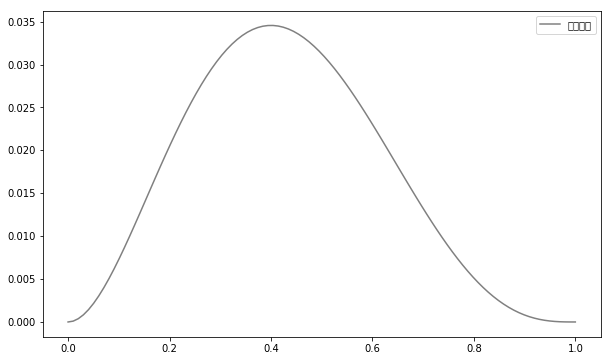

In [90]:
ps = np.linspace(0,1,100)
Ls = [np.prod(stats.bernoulli(prob).pmf(coin_result)) for prob in ps]
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(ps, Ls, label='尤度関数', color='gray')
ax.legend()
plt.show()

In [92]:
prob = 0.4
coin_result = [0,1,0,0,1]
rv = stats.bernoulli(prob)
mll = np.sum(np.log(np.prod(rv.pmf(coin_result))))
mll

-3.365058335046282

In [93]:
rv = stats.norm(y_hat, np.sqrt(unexp_var / n))
mll = np.sum(np.log(rv.pdf(y)))
mll

-76.32521428624038

In [94]:
aic = -2 * mll + 2 * (p+1)

In [95]:
aic

156.65042857248076

In [96]:
bic = -2 * mll + np.log(n) * (p+1)
bic

158.64189311958876

In [97]:
formula = '期末テスト ~ 小テスト + 睡眠時間'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  期末テスト   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           6.19e-06
Time:                        23:46:26   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
小テスト           6.4289      0.956      6.725      0.000       4.412       8.446
睡眠時間           4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
eps_hat = np.array(result.resid)

In [99]:
stats.skew(eps_hat)

0.660

In [100]:
stats.kurtosis(eps_hat, fisher=False)

2.437

In [101]:
np.sum(np.diff(eps_hat, 1)**2) / np.sum(eps_hat ** 2)

1.5082185264423016

In [102]:
df['中テスト'] = df['小テスト'] * 2
df.head()

,小テスト,期末テスト,睡眠時間,通学方法,中テスト
0,4.2,67,7.2,バス,8.4
1,7.2,71,7.9,自転車,14.4
2,0.0,19,5.3,バス,0.0
3,3.0,35,6.8,徒歩,6.0
4,1.5,35,7.5,徒歩,3.0


In [103]:
formula = '期末テスト ~ 小テスト + 中テスト'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  期末テスト   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           8.59e-06
Time:                        23:50:46   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
小テスト           1.3107      0.214      6.133      0.000       0.862       1.760
中テスト           2.6215      0.427      6.133      0.000       1.723       3.519
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                     1.09e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""